In [1]:
import requests
import time

data_points = []
attempt = 0

print("Starting ISS data collection...")

while len(data_points) < 100:
    attempt += 1
    try:
        response = requests.get("http://api.open-notify.org/iss-now.json", timeout=10)
        response.raise_for_status()  # raise error for HTTP 4xx/5xx
        iss_data = response.json()

        position = iss_data["iss_position"]
        timestamp = iss_data["timestamp"]
        lat = float(position["latitude"])
        lon = float(position["longitude"])

        data_points.append((timestamp, lat, lon))
        print(f"[{len(data_points)}/100] Collected at {timestamp}: lat={lat}, lon={lon}")

    except requests.exceptions.RequestException as e:
        print(f"[Attempt {attempt}] Failed to fetch data: {e}. Retrying in 10 seconds...")

    time.sleep(10)

print("✅ Data collection complete!")

Starting ISS data collection...
[1/100] Collected at 1751518844: lat=37.2174, lon=14.007
[2/100] Collected at 1751518855: lat=36.7894, lon=14.625
[3/100] Collected at 1751518866: lat=36.3166, lon=15.2933
[4/100] Collected at 1751518876: lat=35.9021, lon=15.8673
[5/100] Collected at 1751518887: lat=35.4636, lon=16.463
[6/100] Collected at 1751518899: lat=34.9795, lon=17.1074
[7/100] Collected at 1751518909: lat=34.5553, lon=17.6612
[8/100] Collected at 1751518919: lat=34.1069, lon=18.236
[9/100] Collected at 1751518933: lat=33.5258, lon=18.9655
[10/100] Collected at 1751518943: lat=33.0922, lon=19.499
[11/100] Collected at 1751518953: lat=32.6342, lon=20.0531
[12/100] Collected at 1751518965: lat=32.1293, lon=20.6529
[13/100] Collected at 1751518978: lat=31.5324, lon=21.348
[14/100] Collected at 1751518988: lat=31.0874, lon=21.8567
[15/100] Collected at 1751518999: lat=30.6177, lon=22.3851
[16/100] Collected at 1751519009: lat=30.1456, lon=22.9081
[17/100] Collected at 1751519020: lat=2

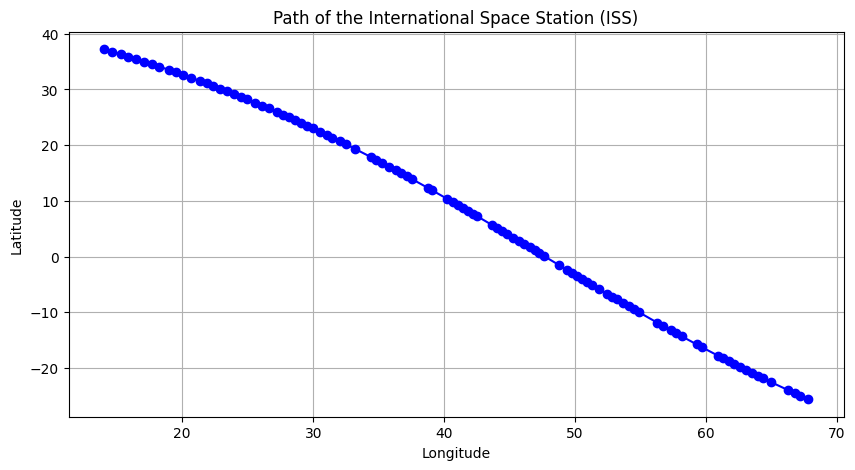

In [2]:
import matplotlib.pyplot as plt

timestamps = [dp[0] for dp in data_points]
latitudes = [dp[1] for dp in data_points]
longitudes = [dp[2] for dp in data_points]

plt.figure(figsize=(10, 5))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue')
plt.title("Path of the International Space Station (ISS)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()